In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Understanding the data
FuelConsumption.csv: Contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

MODELYEAR e.g. 2014 MAKE e.g. Acura MODEL e.g. ILX VEHICLE CLASS e.g. SUV ENGINE SIZE e.g. 4.7 CYLINDERS e.g 6 TRANSMISSION e.g. A6 FUELTYPE e.g. z FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9 FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9 FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2 CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [15]:
# The code was removed by Watson Studio for sharing.

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


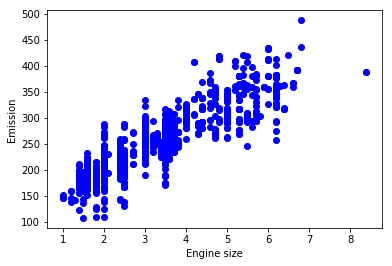

In [17]:
# Plot emissions with respect to engine size to see relationship
plt.scatter(df_fuel.ENGINESIZE, df_fuel.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
#Split data into training and testing datasets
msk = np.random.rand(len(df_fuel)) < 0.8
train = df_fuel[msk]
test = df_fuel[~msk]

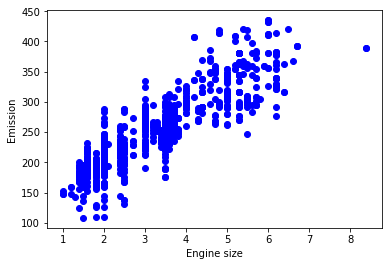

In [20]:
# Training data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

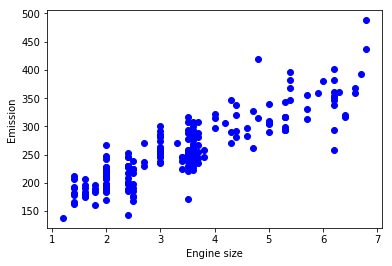

In [21]:
# Testing data distribution
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Model the data

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.38443566  8.12847659  9.55291049]]


## Algorithm Definition
As mentioned before, Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS) OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Prediction

In [23]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 489.34
Variance score: 0.86


### Evaluate Model 

In [32]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### explained variance regression score:
If 𝑦̂ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦} The best possible score is 1.0, lower values are worse.

In [33]:
# Explained Variance Score
print('Variance score: %.2f' % explained_variance_score(y,y_hat))

Variance score: 0.86


In [34]:
# Mean Absolute Error
print('MAE: %.2f' % mean_absolute_error(y,y_hat))

MAE: 15.73


In [35]:
# Mean Squared Error
print('MSE: %.2f' % mean_squared_error(y,y_hat))

MSE: 489.34


In [36]:
# Root Mean Squared Error
from math import sqrt

rmse = sqrt(mean_squared_error(y, y_hat))
print('RMSE: %.2f' % rmse)

RMSE: 22.12


In [37]:
# R2 Score
print('R2: %.2f' % r2_score(y,y_hat))

R2: 0.86
